In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [15]:
!pip install np_utils

In [16]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
import np_utils

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
Ravdess = "/content/drive/MyDrive/Audio_Dataset/Ravdess/audio_speech_actors_01-24/"
Crema = "/content/drive/MyDrive/Audio_Dataset/crema/AudioWAV/"
Tess = "/content/drive/MyDrive/Audio_Dataset/Toronto emotional speech dataset/"
Savee = "/content/drive/MyDrive/Audio_Dataset/savee/AudioData/AudioData/"

In [ ]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

Emotions                                               Path
0  neutral  /content/drive/MyDrive/Audio_Dataset/Ravdess/a...
1  neutral  /content/drive/MyDrive/Audio_Dataset/Ravdess/a...
2  neutral  /content/drive/MyDrive/Audio_Dataset/Ravdess/a...
3     calm  /content/drive/MyDrive/Audio_Dataset/Ravdess/a...
4  neutral  /content/drive/MyDrive/Audio_Dataset/Ravdess/a...

In [ ]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                               Path
0    happy  /content/drive/MyDrive/Audio_Dataset/crema/Aud...
1    angry  /content/drive/MyDrive/Audio_Dataset/crema/Aud...
2      sad  /content/drive/MyDrive/Audio_Dataset/crema/Aud...
3    angry  /content/drive/MyDrive/Audio_Dataset/crema/Aud...
4     fear  /content/drive/MyDrive/Audio_Dataset/crema/Aud...

In [ ]:
tess_directory_list = os.listdir(Tess)

file_emotion = []
file_path = []

for dir in tess_directory_list:
    directories = os.listdir(Tess + dir)
    for file in directories:
        part = file.split('.')[0]
        part = part.split('_')[2]
        if part=='ps':
            file_emotion.append('surprise')
        else:
            file_emotion.append(part)
        file_path.append(Tess + dir + '/' + file)

# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Tess_df = pd.concat([emotion_df, path_df], axis=1)
Tess_df.head()

Emotions                                               Path
0     fear  /content/drive/MyDrive/Audio_Dataset/Toronto e...
1     fear  /content/drive/MyDrive/Audio_Dataset/Toronto e...
2     fear  /content/drive/MyDrive/Audio_Dataset/Toronto e...
3     fear  /content/drive/MyDrive/Audio_Dataset/Toronto e...
4     fear  /content/drive/MyDrive/Audio_Dataset/Toronto e...

In [ ]:
# savee_directory_list = os.listdir(Savee)

# file_emotion = []
# file_path = []

# for file1 in savee_directory_list:
#   for file in file1:
#     file_path.append(Savee + file)
#     print(file)
#     part = file.split('_')[1]
#     ele = part[:-6]
#     if ele=='a':
#         file_emotion.append('angry')
#     elif ele=='d':
#         file_emotion.append('disgust')
#     elif ele=='f':
#         file_emotion.append('fear')
#     elif ele=='h':
#         file_emotion.append('happy')
#     elif ele=='n':
#         file_emotion.append('neutral')
#     elif ele=='sa':
#         file_emotion.append('sad')
#     else:
#         file_emotion.append('surprise')

# # dataframe for emotion of files
# emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# # dataframe for path of files.
# path_df = pd.DataFrame(file_path, columns=['Path'])
# Savee_df = pd.concat([emotion_df, path_df], axis=1)
# Savee_df.head()

In [ ]:
# creating Dataframe using all the 4 dataframes we created so far.
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0  neutral  /content/drive/MyDrive/Audio_Dataset/Ravdess/a...
1  neutral  /content/drive/MyDrive/Audio_Dataset/Ravdess/a...
2  neutral  /content/drive/MyDrive/Audio_Dataset/Ravdess/a...
3     calm  /content/drive/MyDrive/Audio_Dataset/Ravdess/a...
4  neutral  /content/drive/MyDrive/Audio_Dataset/Ravdess/a...

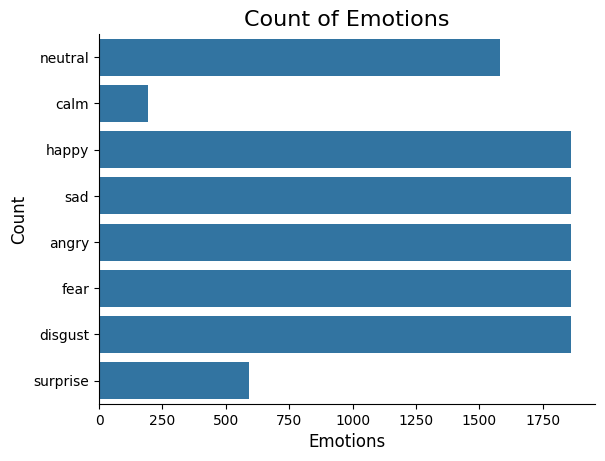

In [ ]:
plt.title('Count of Emotions', size=16)
sns.countplot(data_path.Emotions)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

In [41]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

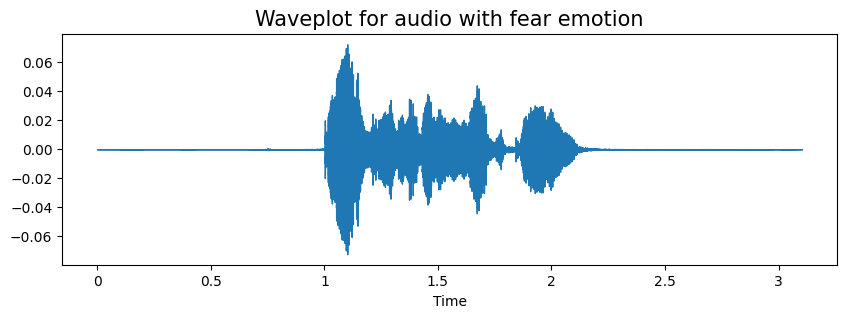

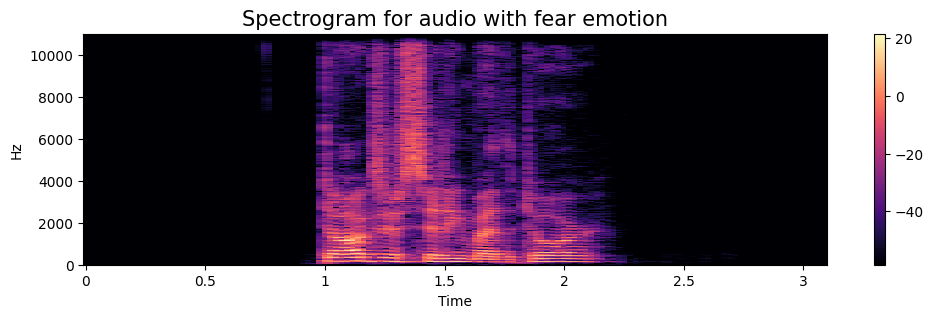

In [ ]:
emotion='fear'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


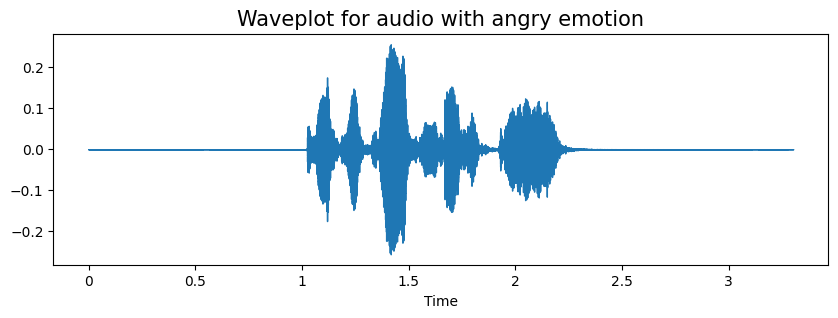

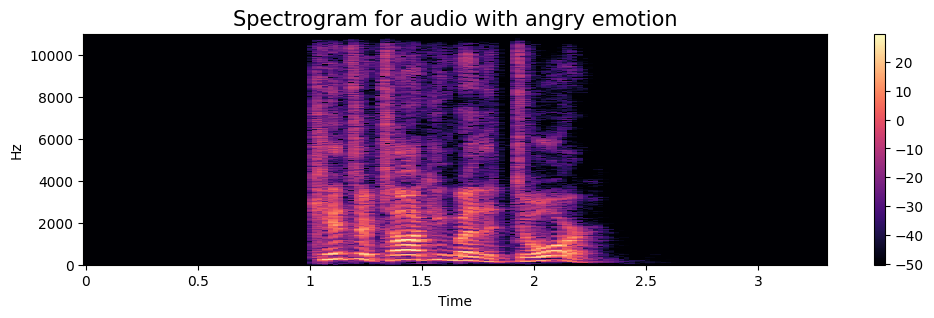

In [ ]:
emotion='angry'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

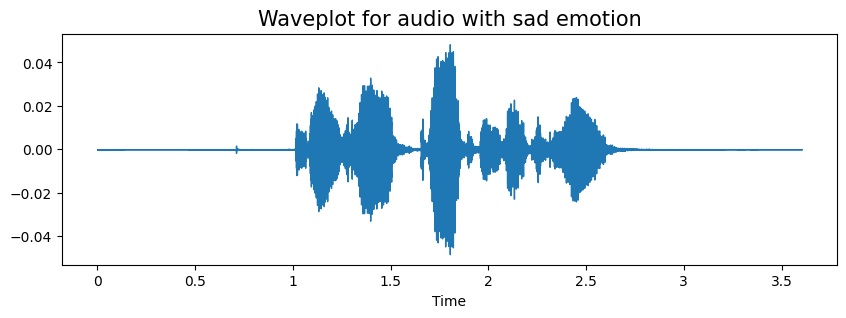

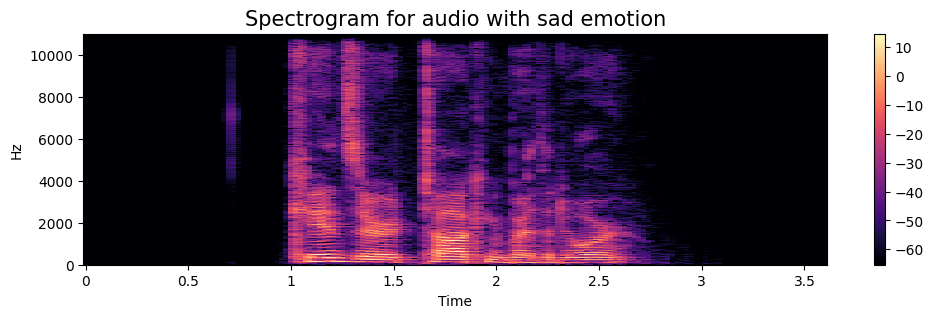

In [ ]:
emotion='sad'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

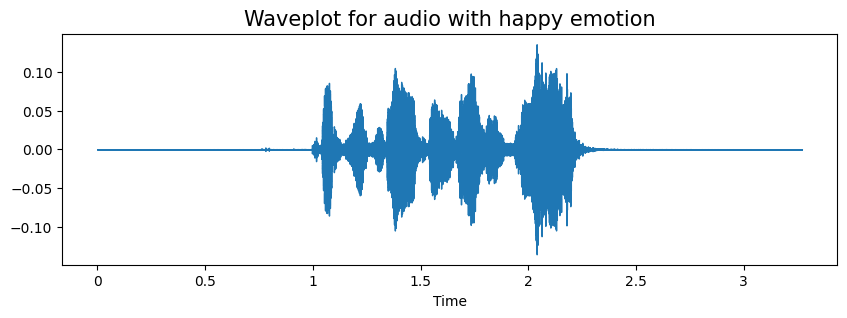

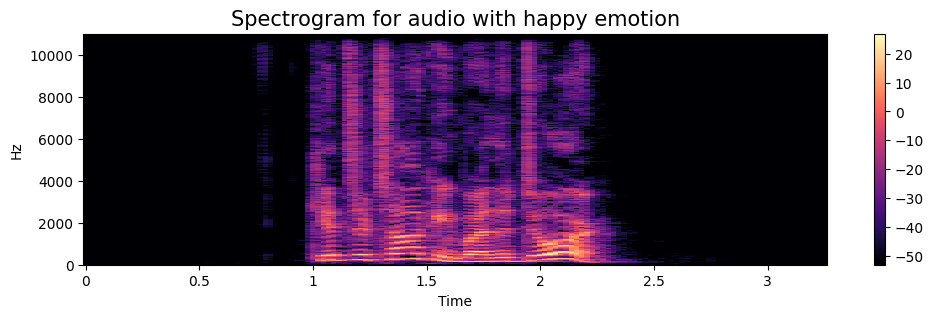

In [ ]:
emotion='happy'
path = np.array(data_path.Path[data_path.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

In [43]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate = 0.8)

def shift(data):
    shift_range = int(np.random.uniform(low=-5, high = 5)*1000)
    return np.roll(data, shift_range)

def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor=0.7)

# taking any example and checking for techniques.
path = np.array(data_path.Path)[1]
data, sample_rate = librosa.load(path)

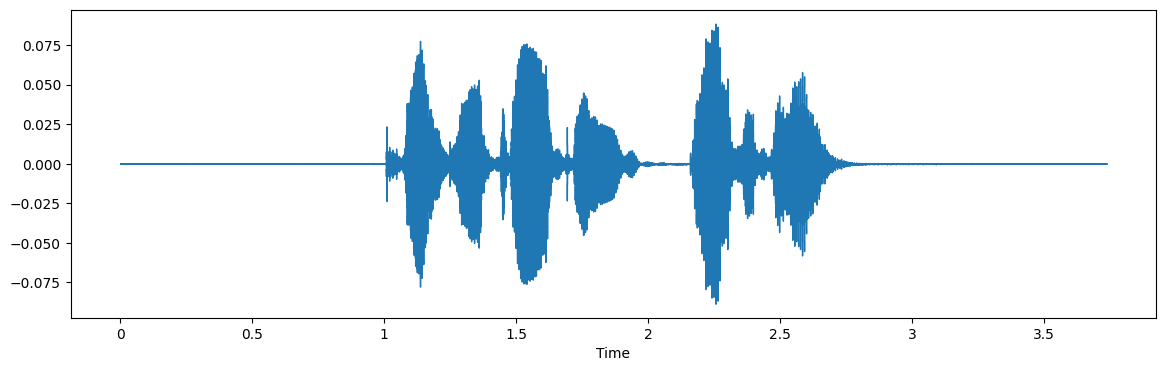

In [ ]:
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=data, sr=sample_rate)
Audio(path)

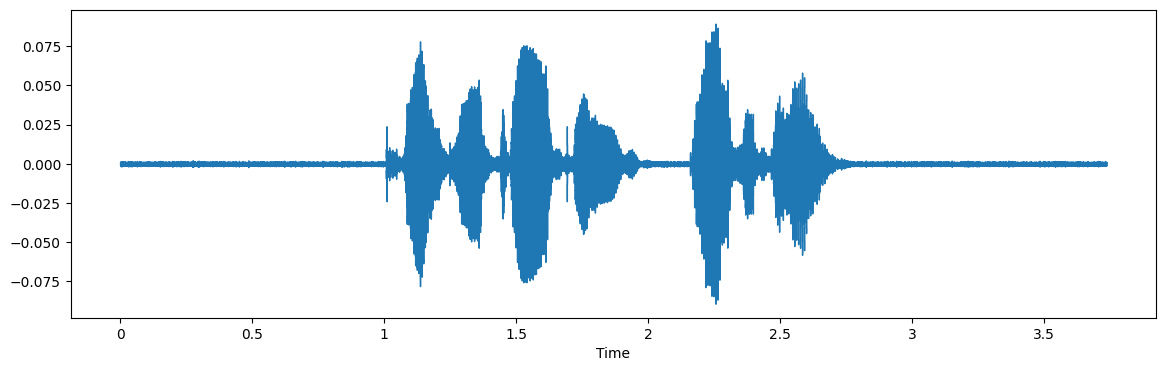

In [ ]:
x = noise(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

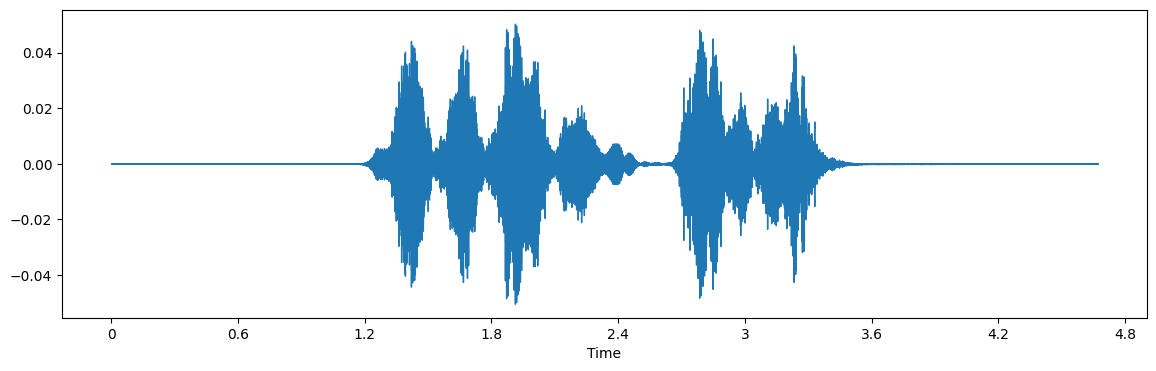

In [ ]:
x = stretch(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

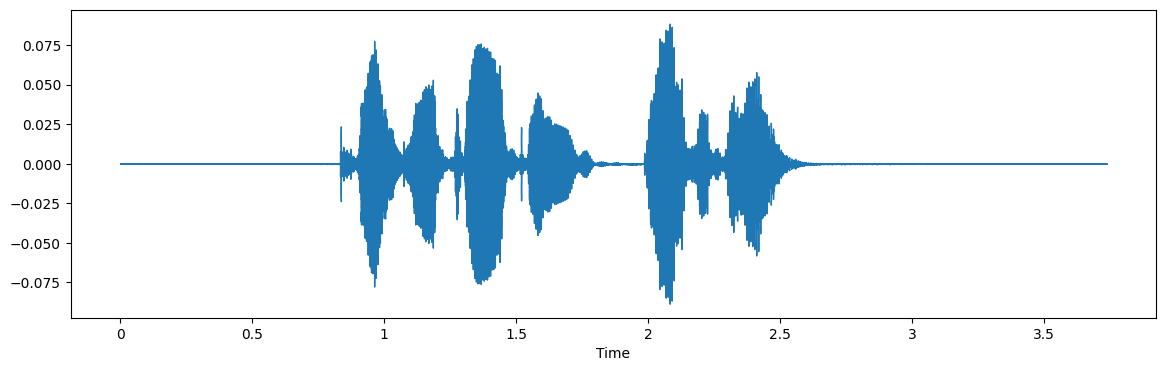

In [ ]:
x = shift(data)
plt.figure(figsize=(14,4))
librosa.display.waveshow(y=x, sr=sample_rate)
Audio(x, rate=sample_rate)

In [81]:
import numpy as np
import librosa

def extract_features(data, sample_rate):
    # ZCR
    result = np.array([])
    zcr = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    result = np.hstack((result, zcr))  # stacking horizontally

    # Chroma_stft
    stft = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T, axis=0)
    result = np.hstack((result, chroma_stft))  # stacking horizontally

    # MFCC
    mfcc = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mfcc))  # stacking horizontally

    # Root Mean Square Value
    rms = np.mean(librosa.feature.rms(y=data).T, axis=0)
    result = np.hstack((result, rms))  # stacking horizontally

    # MelSpectrogram
    mel = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    result = np.hstack((result, mel))  # stacking horizontally

    return result

def get_features(path):
    # duration and offset are used to take care of the no audio in start and the ending of each audio files as seen above.
    data, sample_rate = librosa.load(path, duration=2.5, offset=0.6)

    # without augmentation
    res1 = extract_features(data, sample_rate)
    result = np.array(res1)

    # data with noise
    noise_data = noise(data)
    res2 = extract_features(noise_data, sample_rate)
    result = np.vstack((result, res2))  # stacking vertically

    # data with stretching and pitching
    # new_data = stretch(data)
    # data_stretch_pitch = pitch(new_data, sample_rate)
    # res3 = extract_features(data_stretch_pitch, sample_rate)
    # result = np.vstack((result, res3))  # stacking vertically

    return result

In [ ]:
X, Y = [], []
for path, emotion in zip(data_path.Path, data_path.Emotions):
    feature = get_features(path)
    for ele in feature:
        X.append(ele)
        # appending emotion 3 times as we have made 3 augmentation techniques on each audio file.
        Y.append(emotion)

/usr/local/lib/python3.10/dist-packages/librosa/core/pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [ ]:
len(X), len(Y), data_path.Path.shape

(23364, 23364, (11682,))

In [ ]:
Features = pd.DataFrame(X)
Features['labels'] = Y
Features.to_csv('features.csv', index=False)
Features.head()

0         1         2         3         4         5         6  \
0  0.208989  0.703067  0.722071  0.645243  0.583377  0.610369  0.577258   
1  0.296242  0.756930  0.793146  0.754586  0.722873  0.769256  0.683778   
2  0.164587  0.627148  0.657013  0.674583  0.735250  0.740369  0.653378   
3  0.230907  0.656720  0.694319  0.713219  0.762743  0.790372  0.694865   
4  0.236450  0.576153  0.635653  0.713437  0.714690  0.744456  0.673413   

          7         8         9  ...       153       154       155       156  \
0  0.553561  0.582181  0.611153  ...  0.000030  0.000033  0.000039  0.000039   
1  0.623072  0.657146  0.677986  ...  0.000296  0.000320  0.000340  0.000332   
2  0.582921  0.554685  0.549471  ...  0.000040  0.000070  0.000082  0.000083   
3  0.602276  0.581616  0.584219  ...  0.000048  0.000078  0.000090  0.000093   
4  0.636131  0.593982  0.580515  ...  0.000282  0.000335  0.000269  0.000581   

        157       158       159       160       161   labels  
0  0.000040  0.000043  0.000049  0.000033  0.000002  neutral  
1  0.000330  0.000334  0.000338  0.000314  0.000296  neutral  
2  0.000066  0.000091  0.000087  0.000041  0.000002  neutral  
3  0.000076  0.000099  0.000095  0.000048  0.000010  neutral  
4  0.000484  0.000325  0.000266  0.000101  0.000008  neutral  

[5 rows x 163 columns]

In [27]:
Features = pd.read_csv("/content/features (1).csv")

In [28]:
X = Features.iloc[: ,:-1].values
Y = Features['labels'].values

In [29]:
# As this is a multiclass classification problem onehotencoding our Y.
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()

In [30]:
# splitting data
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((17523, 162), (17523, 7), (5841, 162), (5841, 7))

In [ ]:
# scaling our data with sklearn's Standard scaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((17523, 162), (17523, 8), (5841, 162), (5841, 8))

In [31]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((17523, 162, 1), (17523, 7), (5841, 162, 1), (5841, 7))

In [32]:
model=Sequential()
model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))
model.add(Dropout(0.2))

model.add(Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=5, strides = 2, padding = 'same'))

model.add(Flatten())
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(units=7, activation='softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 162, 256)          1536      
                                                                 
 max_pooling1d_8 (MaxPoolin  (None, 81, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_9 (Conv1D)           (None, 81, 256)           327936    
                                                                 
 max_pooling1d_9 (MaxPoolin  (None, 41, 256)           0         
 g1D)                                                            
                                                                 
 conv1d_10 (Conv1D)          (None, 41, 128)           163968    
                                                                 
 max_pooling1d_10 (MaxPooli  (None, 21, 128)          

In [33]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 50
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5',
                               verbose=1, save_best_only=True)
start = datetime.now()

history = model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/50
548/548 [==============================] - ETA: 0s - loss: 1.9948 - accuracy: 0.1862
Epoch 1: val_loss improved from inf to 1.80605, saving model to saved_models/audio_classification.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


548/548 [==============================] - 124s 223ms/step - loss: 1.9948 - accuracy: 0.1862 - val_loss: 1.8060 - val_accuracy: 0.2375
Epoch 2/50
548/548 [==============================] - ETA: 0s - loss: 1.7868 - accuracy: 0.2512
Epoch 2: val_loss improved from 1.80605 to 1.70208, saving model to saved_models/audio_classification.hdf5
548/548 [==============================] - 119s 216ms/step - loss: 1.7868 - accuracy: 0.2512 - val_loss: 1.7021 - val_accuracy: 0.2746
Epoch 3/50
548/548 [==============================] - ETA: 0s - loss: 1.6926 - accuracy: 0.2901
Epoch 3: val_loss improved from 1.70208 to 1.57870, saving model to saved_models/audio_classification.hdf5
548/548 [==============================] - 115s 210ms/step - loss: 1.6926 - accuracy: 0.2901 - val_loss: 1.5787 - val_accuracy: 0.3809
Epoch 4/50
548/548 [==============================] - ETA: 0s - loss: 1.6357 - accuracy: 0.3146
Epoch 4: val_loss improved from 1.57870 to 1.52874, saving model to saved_models/audio_classi

In [ ]:
# rlrp = ReduceLROnPlateau(monitor='loss', factor=0.4, verbose=0, patience=2, min_lr=0.0000001)
# history=model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[rlrp])

183/183 [==============================] - 10s 54ms/step - loss: 0.9842 - accuracy: 0.6184
Accuracy of our model on test data :  61.838728189468384 %


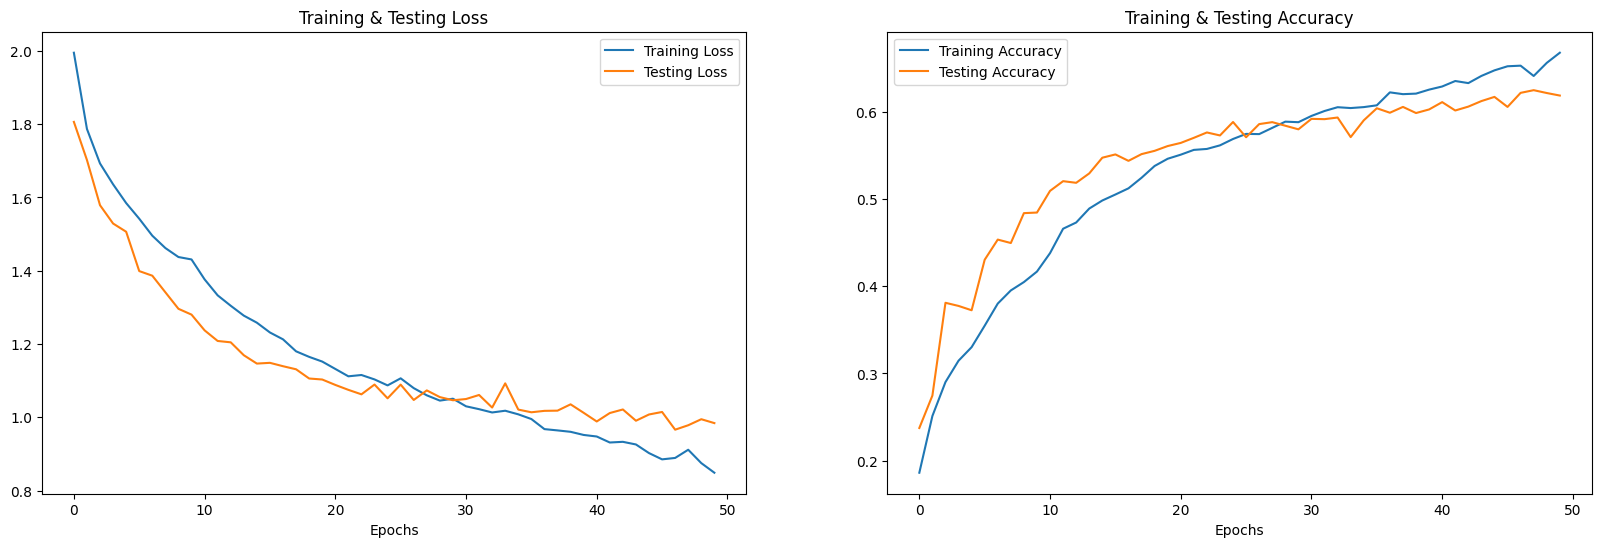

In [34]:
print("Accuracy of our model on test data : " , model.evaluate(x_test,y_test)[1]*100 , "%")

epochs = [i for i in range(50)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

fig.set_size_inches(20,6)
ax[0].plot(epochs , train_loss , label = 'Training Loss')
ax[0].plot(epochs , test_loss , label = 'Testing Loss')
ax[0].set_title('Training & Testing Loss')
ax[0].legend()
ax[0].set_xlabel("Epochs")

ax[1].plot(epochs , train_acc , label = 'Training Accuracy')
ax[1].plot(epochs , test_acc , label = 'Testing Accuracy')
ax[1].set_title('Training & Testing Accuracy')
ax[1].legend()
ax[1].set_xlabel("Epochs")
plt.show()

In [35]:
# predicting on test data.
pred_test = model.predict(x_test)
y_pred = encoder.inverse_transform(pred_test)

y_test = encoder.inverse_transform(y_test)

183/183 [==============================] - 9s 46ms/step


In [36]:
df = pd.DataFrame(columns=['Predicted Labels', 'Actual Labels'])
df['Predicted Labels'] = y_pred.flatten()
df['Actual Labels'] = y_test.flatten()

df.head(10)


Predicted Labels Actual Labels
0             fear          fear
1         surprise      surprise
2            happy         happy
3          neutral         happy
4          neutral           sad
5            angry         angry
6              sad           sad
7          neutral       neutral
8          neutral         happy
9              sad       neutral

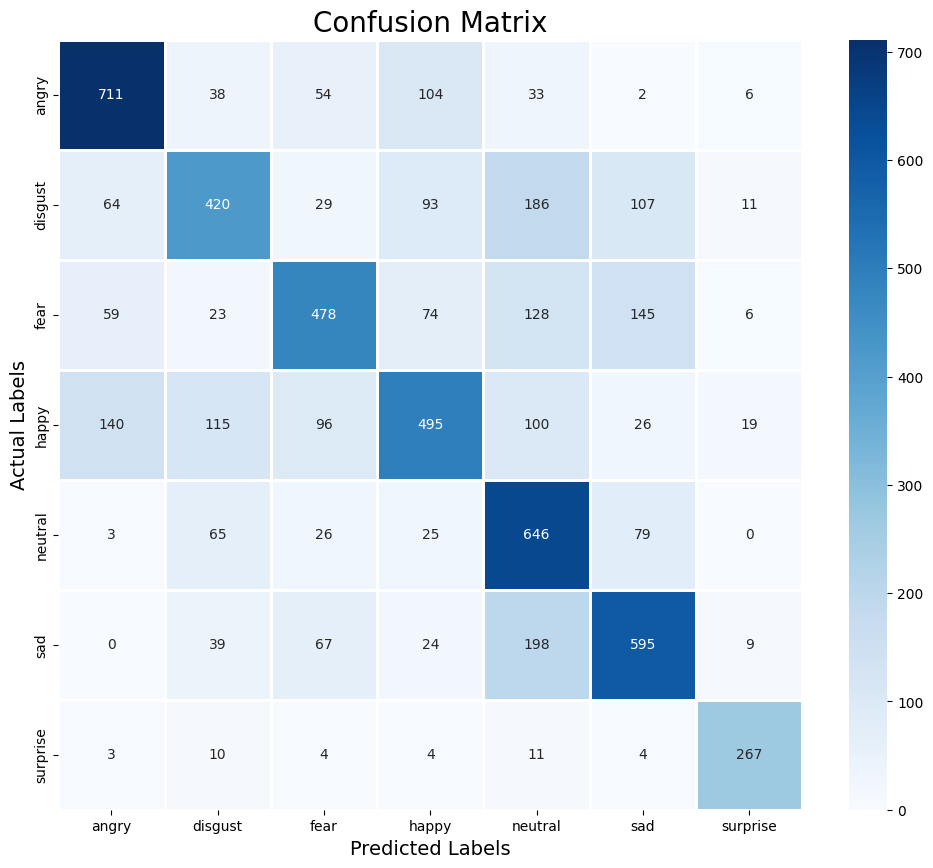

In [37]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (12, 10))
cm = pd.DataFrame(cm , index = [i for i in encoder.categories_] , columns = [i for i in encoder.categories_])
sns.heatmap(cm, linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
plt.show()

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       angry       0.73      0.75      0.74       948
     disgust       0.59      0.46      0.52       910
        fear       0.63      0.52      0.57       913
       happy       0.60      0.50      0.55       991
     neutral       0.50      0.77      0.60       844
         sad       0.62      0.64      0.63       932
    surprise       0.84      0.88      0.86       303

    accuracy                           0.62      5841
   macro avg       0.64      0.65      0.64      5841
weighted avg       0.63      0.62      0.61      5841



In [65]:
def emotion_test(audio):
  # data, sample_rate = librosa.load(audio, duration=2.5, offset=0.6)
  data = get_features(audio)
  pred_new_test = model.predict(data)
  y_new_pred = (encoder.inverse_transform(pred_new_test)).flatten()
  print(y_new_pred)

In [79]:
def featuress_extractor(filename):
  audio, sample_rate = librosa.load(filename)
  mfccs_feature = librosa.feature.mfcc(y=audio, sr=sample_rate)
  mfccs_scaled_feature = np.mean(mfccs_feature.T, axis=0)

  return mfccs_scaled_feature

In [97]:
data = get_features("/content/Voicy_Tareekh par tareekh.wav")
#data.shape
data = np.expand_dims(data, axis=2)
data.shape
pred_new_test = model.predict(data)
y_new_pred = (encoder.inverse_transform(pred_new_test)).flatten()
print(y_new_pred)

1/1 [==============================] - 0s 49ms/step
['angry' 'angry']
